In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.utils as utils

In [2]:
conns = []
conns.append(db.OpsimDatabaseV4('astro-lsst-01_2013.db'))
conns.append(db.Database('feature_baseline_10yrs.db', defaultTable='observations'))
nside=256

In [3]:
sql = 'filter ="r"'
metric = metrics.Coaddm5Metric(m5Col='fiveSigmaDepth')
slicer = slicers.HealpixSlicer(nside=nside, latCol='fieldDec', lonCol='fieldRA')
bundle = metricBundles.MetricBundle(metric, slicer, sql)

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


In [4]:
bd = metricBundles.makeBundlesDictFromList([bundle])
group = metricBundles.MetricBundleGroup(bd, conns[0], outDir='undithered')
group.runAll()

Querying database SummaryAllProps with constraint filter ="r" for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth']
Found 507717 visits
Running:  ['opsim_CoaddM5_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "filter ="r"" constraint now.
monopole: 26.8305  dipole: lon: 159.294, lat: -74.8691, amp: 0.173747
Plotting complete.


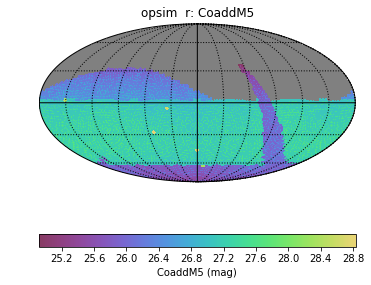

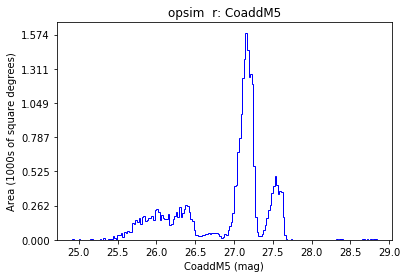

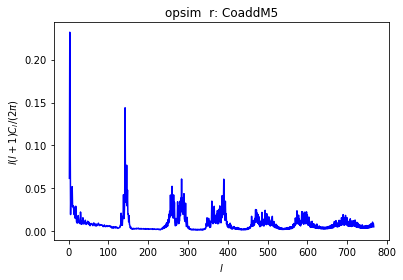

In [5]:
group.plotAll(closefigs=False)

In [6]:
sql = 'filter ="r"'
metric = metrics.Coaddm5Metric(m5Col='fiveSigmaDepth')
slicer = slicers.HealpixSlicer(nside=nside, latCol='hexDitherFieldPerNightDec', lonCol='hexDitherFieldPerNightRa')
bundle2 = metricBundles.MetricBundle(metric, slicer, sql)

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


Querying database SummaryAllProps with constraint filter ="r" for columns ['fieldDec', 'fieldId', 'night', 'fiveSigmaDepth', 'fieldRA']
Found 507717 visits
Running:  ['opsim_CoaddM5_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter ="r"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 286 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 26.7906  dipole: lon: 133.335, lat: -78.6458, amp: 0.338209
Plotting complete.


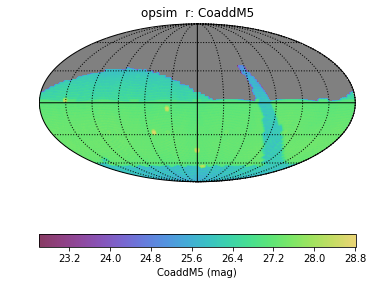

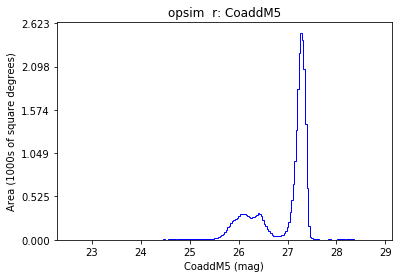

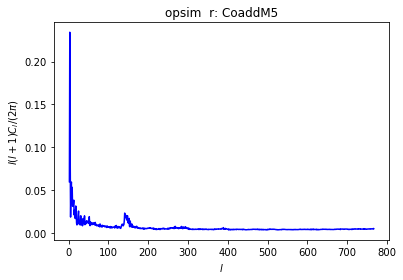

In [7]:
bd = metricBundles.makeBundlesDictFromList([bundle2])
group = metricBundles.MetricBundleGroup(bd, conns[0], outDir='dithered')
group.runAll()
group.plotAll(closefigs=False)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


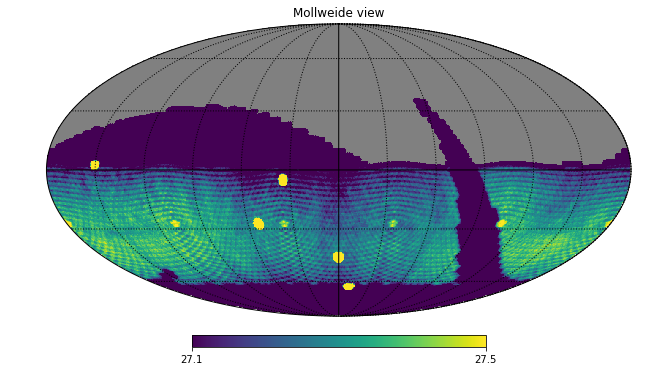

In [8]:
hp.mollview(bundle2.metricValues, max=27.5, min=27.1)
hp.graticule()

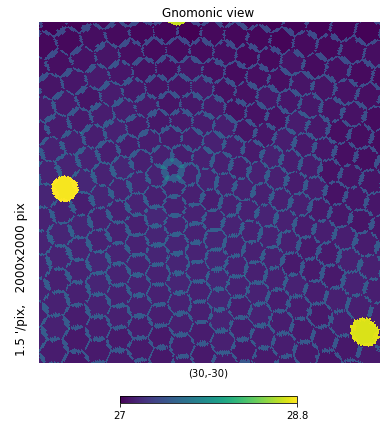

In [9]:
hp.gnomview(bundle.metricValues, rot=(30,-30,0), xsize=2000, ysize=2000)
plt.savefig('undithered_zoom.pdf')

In [10]:
sql = 'filter ="r"'
metric = metrics.Coaddm5Metric(m5Col='fivesigmadepth')
slicer = slicers.HealpixSlicer(nside=nside, latCol='dec', lonCol='RA')
bundle3 = metricBundles.MetricBundle(metric, slicer, sql)

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


Querying database observations with constraint filter ="r" for columns ['fivesigmadepth', 'dec', 'RA']
Found 503803 visits
Running:  ['opsim_CoaddM5_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter ="r"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 366 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 26.6487  dipole: lon: 118.049, lat: -80.3084, amp: 0.413055
Plotting complete.


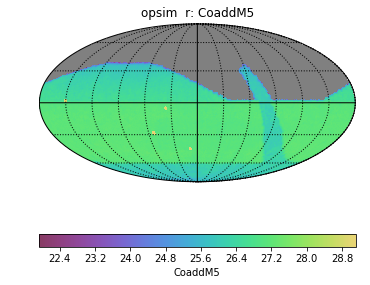

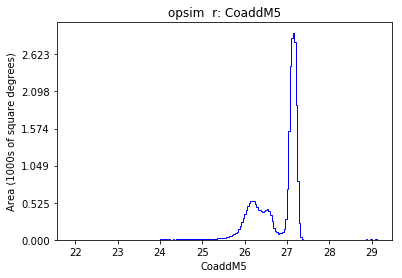

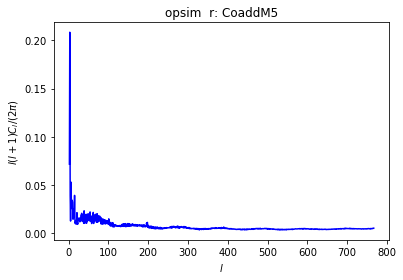

In [11]:
bd = metricBundles.makeBundlesDictFromList([bundle3])
group = metricBundles.MetricBundleGroup(bd, conns[1], outDir='fb')
group.runAll()
group.plotAll(closefigs=False)

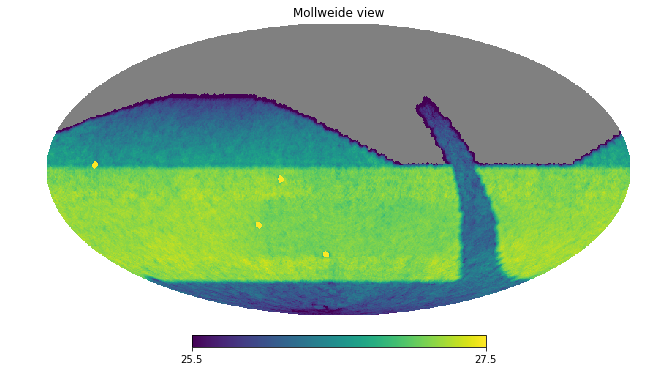

In [12]:
hp.mollview(bundle3.metricValues, min=25.5, max=27.5)

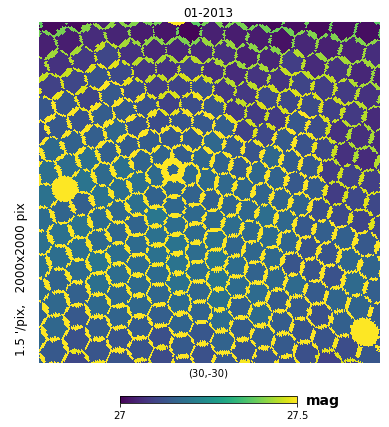

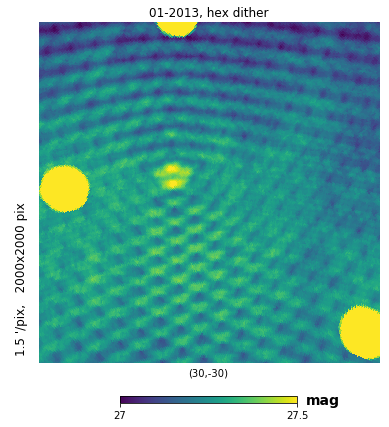

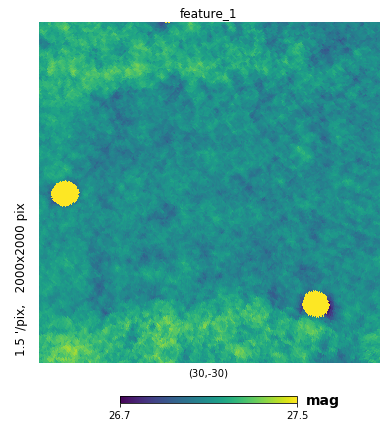

In [13]:
mag_max = 27.5
hp.gnomview(bundle.metricValues, rot=(30,-30,0), xsize=2000, ysize=2000, max=mag_max, unit='mag', title='01-2013')
plt.savefig('undithered_zoomed.pdf')
hp.gnomview(bundle2.metricValues, rot=(30,-30,0), xsize=2000, ysize=2000, max=mag_max, unit='mag', title='01-2013, hex dither')
plt.savefig('dithered_zoomed.pdf')
hp.gnomview(bundle3.metricValues, rot=(30,-30,0), xsize=2000, ysize=2000, max=mag_max, unit='mag', title='feature_1')
plt.savefig('feature_zoomed.pdf')

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+4/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projector.py:186: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  mpix[map.mask[pix]] = UNSEEN


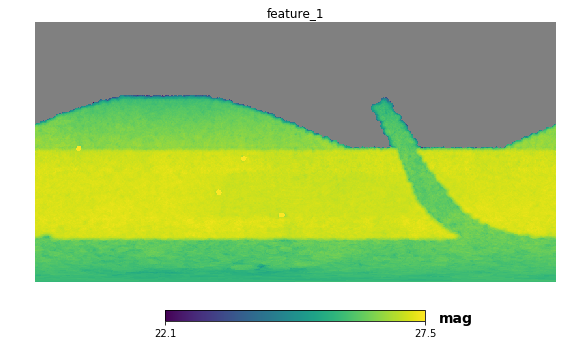

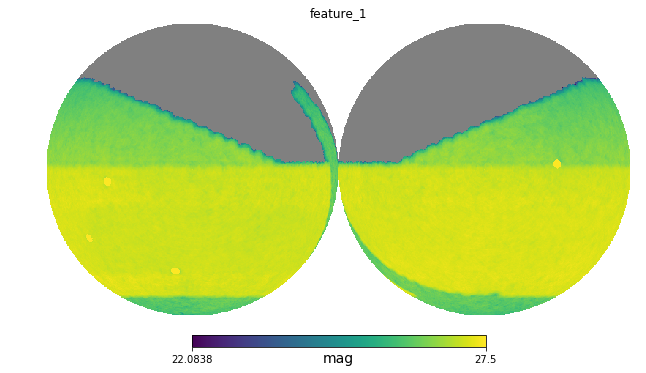

In [19]:
# Can I get rid of those weird rings with a different projection
hp.cartview(bundle3.metricValues,  max=mag_max, unit='mag', title='feature_1')
hp.orthview(bundle3.metricValues, max=mag_max, unit='mag', title='feature_1')


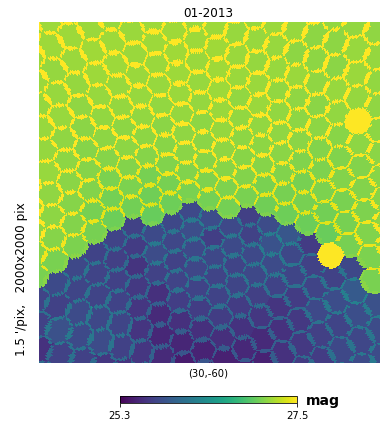

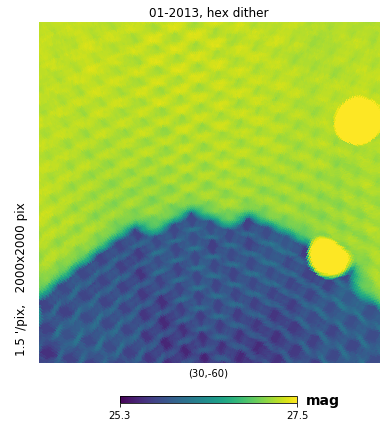

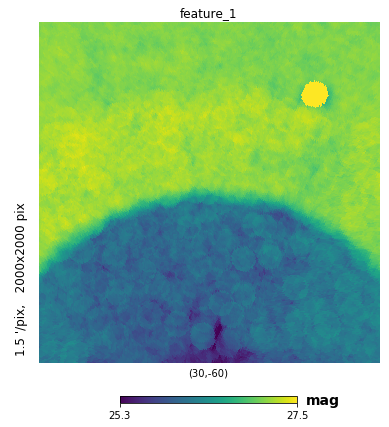

In [15]:
mag_min=25.3
hp.gnomview(bundle.metricValues, rot=(30,-60,0), xsize=2000, ysize=2000, max=mag_max, min=mag_min, unit='mag', title='01-2013')
plt.savefig('undithered_zoomed2.pdf')
hp.gnomview(bundle2.metricValues, rot=(30,-60,0), xsize=2000, ysize=2000, max=mag_max, min=mag_min,unit='mag', title='01-2013, hex dither')
plt.savefig('dithered_zoomed2.pdf')
hp.gnomview(bundle3.metricValues, rot=(30,-60,0), xsize=2000, ysize=2000, max=mag_max, min=mag_min,unit='mag', title='feature_1')
plt.savefig('fb_zoomed2.pdf')